In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Install Dependencies

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install tensorflow tensorflow-datasets ipywidgets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

### Load Dataset

In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
ds = tfds.load("fashion_mnist",split = "train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFZA429/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFZA429/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [ ]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [ ]:
ds.as_numpy_iterator().next()['label']

2

### Vizualize Data and build Dataset

In [ ]:
import numpy as np

In [ ]:
data_iterator = ds.as_numpy_iterator()

In [ ]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

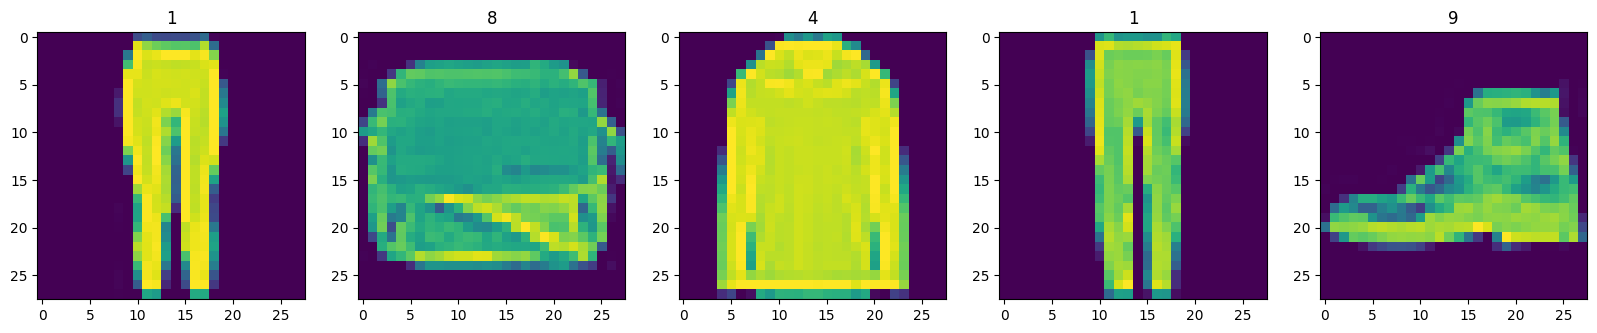

In [ ]:
fig,axs = plt.subplots(ncols = 5, figsize = (20,20))
for idx in range(5):
  sample = data_iterator.next()
  axs[idx].imshow(np.squeeze(sample['image']))
  axs[idx].title.set_text(sample['label'])

In [ ]:
def scale_images(data):
  img = data['image']
  return img / 255

In [ ]:
ds = tfds.load("fashion_mnist",split = "train")
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

### Model Architecure


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, LeakyReLU, Reshape, UpSampling2D

#### Build Generator

In [ ]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128,input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128))) ## Takes in Double round Bracket

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = "same"))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = "same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,5,padding = "same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,5,padding = "same"))
  model.add(LeakyReLU(0.2))

  # Conv layer to get one channel
  model.add(Conv2D(1,4,padding =  "same",activation = "sigmoid"))

  return model

In [ ]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 2s 2s/step


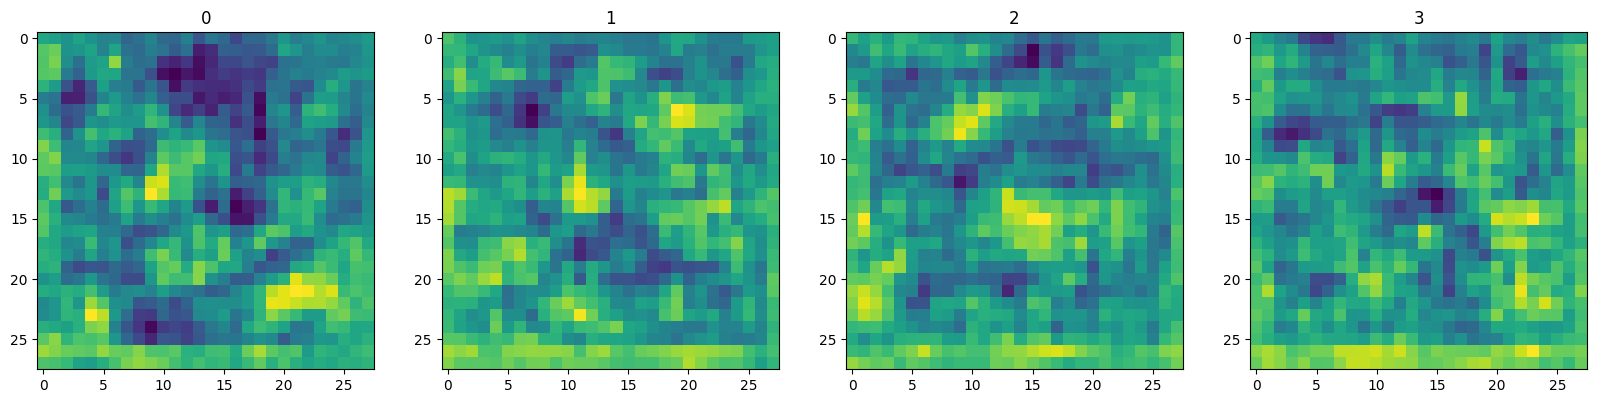

In [ ]:
predict_img= generator.predict(np.random.randn(4,128,1))
fix,axs = plt.subplots(ncols = 4,figsize = (20,20))

for idx,img in enumerate(predict_img):
  axs[idx].imshow(np.squeeze(img))
  axs[idx].title.set_text(idx)

#### Build Descriminator

In [ ]:
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = "sigmoid")) # 1 = False Img and 0 = True Img

  return model

In [ ]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
discriminator.predict(predict_img)

1/1 [==============================] - 0s 266ms/step


array([[0.49176294],
       [0.49180156],
       [0.49180433],
       [0.4920771 ]], dtype=float32)

### Training Loop

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

#### setup loss and optimizer

In [ ]:
generator_optimizer = Adam(learning_rate = 0.0001) ## Learning Rate will be faster than discriminator becuse we don't want discriminator to go too fast and smash generator
discriminator_optimizer = Adam(learning_rate = 0.00001)  ## Don't want Discriminator to go too Fast

generator_loss = BinaryCrossentropy()
discriminator_loss = BinaryCrossentropy()

#### build subclass model

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator = generator
    self.discriminator = discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self,batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

    ## Train Discriminator
    with tf.GradientTape() as d_tape:
      y_hat_real = self.discriminator(real_images, training = True)
      y_hat_fake = self.discriminator(fake_images, training = True)
      y_hat_realfake = tf.concat([y_hat_real,y_hat_fake],axis = 0)

      ## create labels for real and Fake images
      y_realfake = tf.concat([tf.zeros_like(y_hat_real),tf.ones_like(y_hat_fake)],axis = 0)###  Here note that one is tf.zeros_like and another is tf.ones_like : 0 = Real and 1 = Fake

      ## Add Some noise to actual o/t
      noise_real = 0.15 * tf.random.uniform(tf.shape(y_hat_real))
      noise_fake = -0.15 * tf.random.uniform(tf.shape(y_hat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

      ##calculate loss  (binary cross entropy)
      total_d_loss = self.d_loss(y_realfake,y_hat_realfake)

    ## Till now Forward pass has completed

    ## Apply Back Proppagation
    d_grad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)  ## Finds a Gradient
    self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))

    ## Train Generator
    with tf.GradientTape() as g_tape:
      ## Generate Images
      gen_images = self.generator(tf.random.normal((128,128,1)),training = True)

      ## Create Predicted images
      predicted_labels = self.discriminator(gen_images,training = False)

      ## Calculate loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)  ## tf.zero = True that's why tf.zeros
          ## we are finding a loss with respect to tf.zeros (means all images are real as per generator) and predicted labels given by discriminator

      ## Forward pass end

    ## Apply back Prop

    g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))


    return {"d_loss":total_d_loss,"g_loss":total_g_loss}



In [ ]:
## Instance of Custom GAN
customGAN = FashionGAN(generator,discriminator)

In [ ]:
## Compile
customGAN.compile(generator_optimizer,discriminator_optimizer,generator_loss,discriminator_loss)

#### Build Callbacks

In [ ]:
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self,num_img = 3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs = None):
    random_latent_vector = tf.random.uniform((self.num_img,self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vector)
    generated_images *=255
    generated_images.numpy()

    for i in range(self.num_img):
      img = img_to_array(generated_images[i])
      img.save(os.path.join(f"generated_img_{epoch}_{i}.png"))


#### Train

In [ ]:
history = customGAN.fit(ds,epochs = 50)

Epoch 1/50
469/469 [==============================] - 72s 128ms/step - d_loss: 0.4745 - g_loss: 0.8982
Epoch 2/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.5603 - g_loss: 1.3613
Epoch 3/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6784 - g_loss: 0.7374
Epoch 4/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6959 - g_loss: 0.6391
Epoch 5/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6736 - g_loss: 0.6640
Epoch 6/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.7019 - g_loss: 0.5915
Epoch 7/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6975 - g_loss: 0.6208
Epoch 8/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6952 - g_loss: 0.6295
Epoch 9/50
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6954 - g_loss: 0.6304
Epoch 10/50
469/469 [==============================] - 61s 130ms/step - d

#### Review Performance


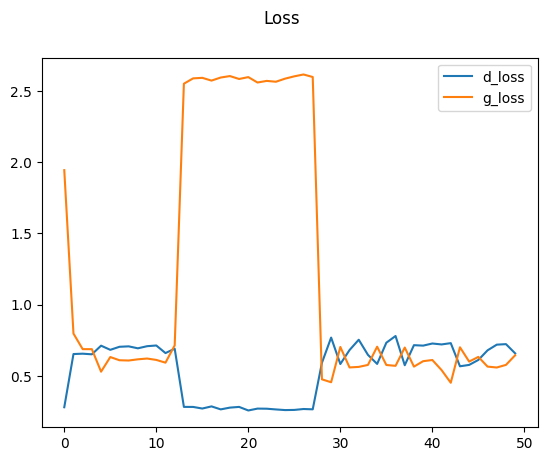

In [ ]:
plt.suptitle("Loss")
plt.plot(history.history['d_loss'],label = 'd_loss')
plt.plot(history.history['g_loss'],label = 'g_loss')
plt.legend()
plt.show()

### Test Generator

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 247ms/step


In [ ]:
imgs.shape

(16, 28, 28, 1)

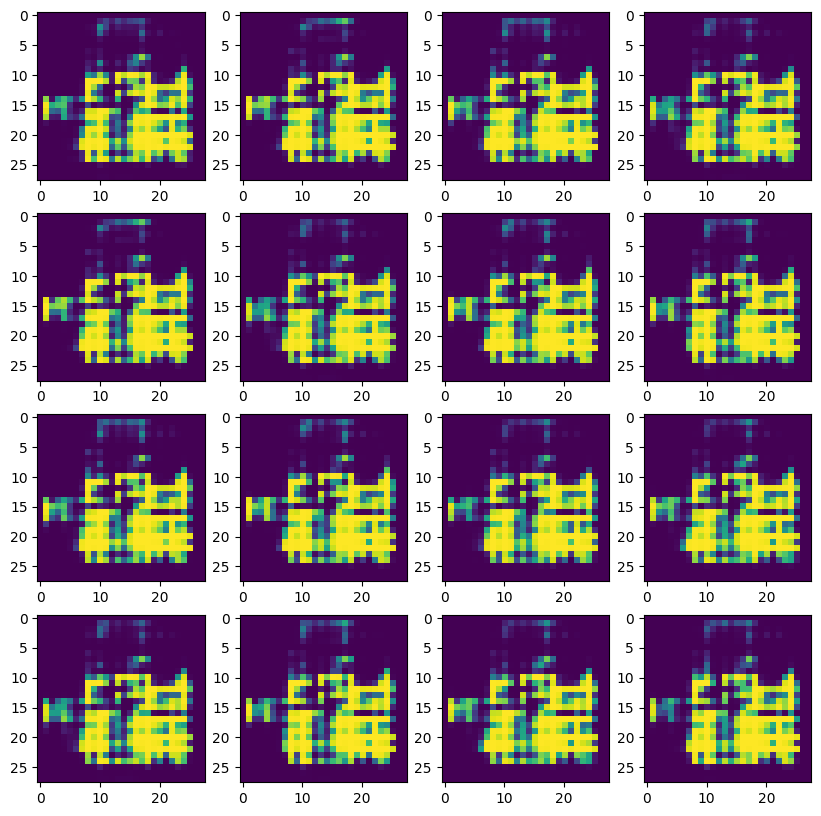

In [ ]:
fig,axs = plt.subplots(ncols = 4,nrows = 4,figsize = (10,10))

for i in range(4):
  for j in range(4):
    axs[i][j].imshow(imgs[(i+1) * (j+1) -1 ])

#### Save Model

In [ ]:
generator.save("/content/drive/MyDrive/generator.h5")
discriminator.save("/content/drive/MyDrive/disctiminator.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
